#### Note
Some visualizations are not shown properly in github, you may view the notebook in nbviewer here - 

https://nbviewer.org/github/tambeyash/IPL---Analysis-using-SQL/blob/master/IPL%20-%20SQL.ipynb

### Importing the libraries and conecting to the dataset

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect("database.sqlite")

In [3]:
c = conn.cursor()

### No of players in the IPL country wise

In [4]:
#query
sql = """
select Country.Country_Name, COUNT(Player.Country_Name) AS Number_of_Players
FROM Country
JOIN Player ON Player.Country_Name=Country.Country_Id
GROUP BY Player.Country_Name
ORDER BY NUmber_of_Players Desc
"""
country = pd.read_sql(sql, conn)

In [5]:
#visualization
cm = sns.color_palette("rocket_r", as_cmap=True)
s = country.style.background_gradient(cmap=cm)
s

,Country_Name,Number_of_Players
0,India,262
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


### Number of matches played in each stadium
 

In [6]:
#query
sql = """
select Venue.Venue_Name, Count(Match.Venue_id) AS Matches_Played, City.City_Name AS Location
from Venue
JOIN Match ON Venue.Venue_Id = Match.Venue_Id
JOIN City ON City.City_Id = Venue.City_Id
GROUP BY Match.Venue_id
ORDER BY Matches_Played DESC
"""
venue = pd.read_sql(sql, conn)

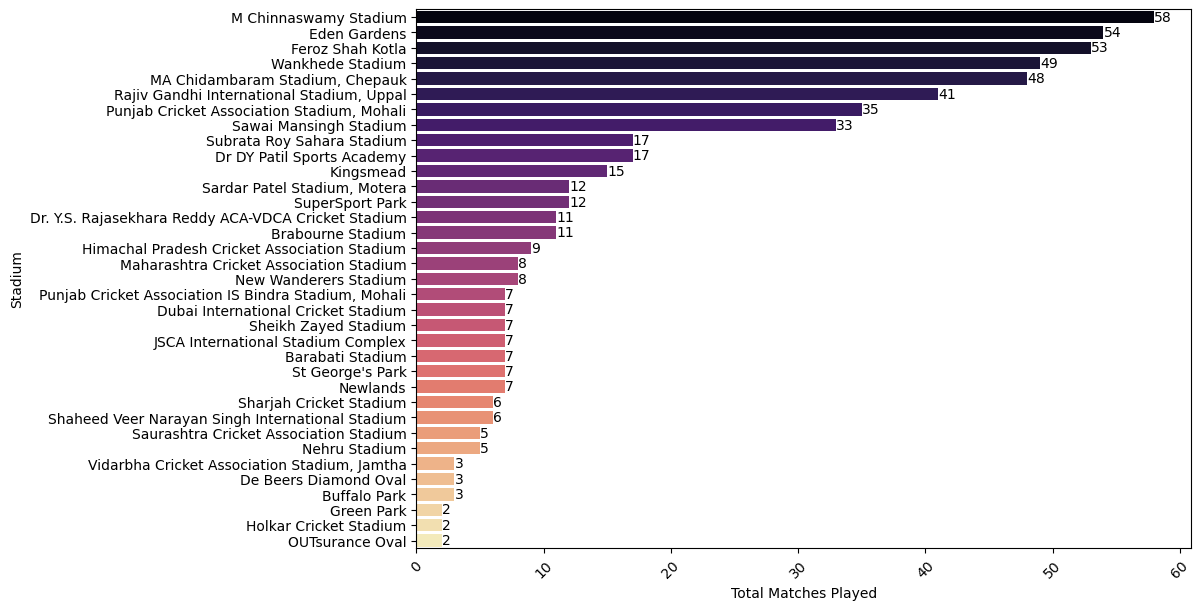

<Figure size 1500x1800 with 0 Axes>

In [7]:
#visualization
plt.figure(figsize = (10,7))
ax=sns.barplot(x = 'Matches_Played',
            y = 'Venue_Name',
            data = venue, orient='h',palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Total Matches Played")
plt.ylabel("Stadium")
plt.xticks(rotation=45)
plt.figure(figsize = (15,18))
plt.show()

### Man of the Series, Purple Cap, Orange Cap winners in every season
 

In [8]:
#query & visualization
sql = """
SELECT s.Season_Year, mos.Player_Name Man_of_the_series, oc.Player_Name Orange_cap, pc.Player_Name Purple_Cap
FROM Season s
Join Player mos ON  mos.Player_Id = s.Man_of_the_Series
Join Player oc ON  oc.Player_Id = s.Orange_Cap
Join Player pc ON  pc.Player_Id = s.Purple_Cap
"""
query = pd.read_sql(sql, conn)
query

,Season_Year,Man_of_the_series,Orange_cap,Purple_Cap
0,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2009,AC Gilchrist,ML Hayden,RP Singh
2,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,2011,CH Gayle,CH Gayle,SL Malinga
4,2012,SP Narine,CH Gayle,M Morkel
5,2013,SR Watson,MEK Hussey,DJ Bravo
6,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,2015,AD Russell,DA Warner,DJ Bravo
8,2016,V Kohli,V Kohli,B Kumar


### Total matches won by each team

In [9]:
#query
sql = """
SELECT  Team.Team_Name as Team_Name,  Count(Match.Match_Winner) AS Number_of_wins
FROM Match
JOIN Team 
ON Team.Team_Id  = Match.Match_Winner
GROUP BY Team_Name
ORDER BY Number_of_wins DESC
"""
matches = pd.read_sql(sql, conn)

In [10]:
#visualization
cm = sns.color_palette("mako_r", as_cmap=True)
s = matches.style.background_gradient(cmap=cm)
s

,Team_Name,Number_of_wins
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Rajasthan Royals,63
5,Kings XI Punjab,63
6,Delhi Daredevils,56
7,Sunrisers Hyderabad,34
8,Deccan Chargers,29
9,Pune Warriors,12


### Wicket types

In [11]:
#query & visualization
sql = """
select o.Out_Name AS Wicket_type, COUNT(w.Kind_Out) AS Total_dissmissals
from Out_Type o
JOIN Wicket_Taken w
ON o.Out_Id = w.Kind_Out
GROUP BY 1
ORDER BY Total_dissmissals DESC
"""
wickets = pd.read_sql(sql, conn)
wickets

,Wicket_type,Total_dissmissals
0,caught,3954
1,bowled,1251
2,run out,697
3,lbw,399
4,stumped,222
5,caught and bowled,187
6,retired hurt,8
7,hit wicket,8
8,obstructing the field,1


### Top 10 wicket takers

In [12]:
#query
sql = """
select p.player_name, COUNT(w.Ball_id) Total_Wickets
from Wicket_taken w
JOIN Ball_by_ball bl
ON w.Match_id = bl.Match_Id
   AND w.Over_id = bl.Over_id
   AND w.ball_id = bl.ball_id
   AND w.Innings_No = bl.Innings_No
JOIN player p
ON p.player_id = bl.bowler

Group by bl.bowler
ORDER BY COUNT(w.Ball_id) DESC
LIMIT 10
"""
wicket_takers = pd.read_sql(sql, conn)

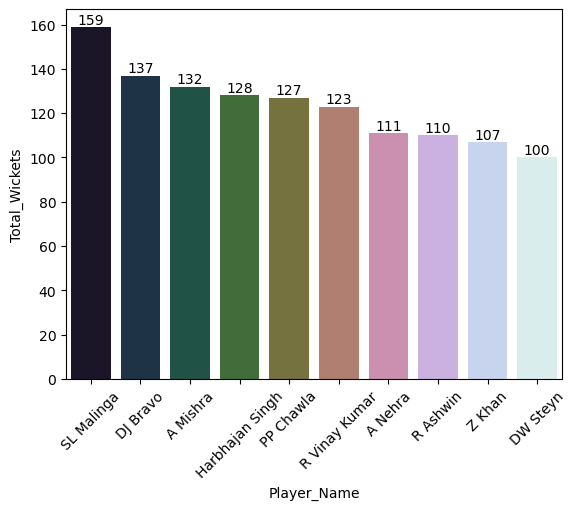

In [13]:
#visualization
axw = sns.barplot(
   x = 'Player_Name',
   y = 'Total_Wickets',
   data = wicket_takers,
   palette = "cubehelix"
)
for i in axw.containers:
    axw.bar_label(i,)
#ax2.grid(b=False) # turn off grid #2
plt.xticks(rotation=45)
plt.show()

##### The clear dominance of SL Malinga can be seen. He is 22 wickets ahead af the 2nd entry on the list!

### Distribution of top 10 run scorers and their strike rate
Strike denotes the runs scored per 100 balls

In [14]:
#query
sql = """
select p.player_name, SUM(ba.Runs_Scored) Total_Runs, COUNT(bl.Striker) AS Total_balls_faced, CAST(SUM(ba.Runs_Scored) as float)*100/CAST(COUNT(bl.Striker) AS Float) Strike_Rate
from batsman_scored ba
JOIN Ball_by_ball bl
ON ba.Match_id = bl.Match_Id
   AND ba.Over_id = bl.Over_id
   AND ba.ball_id = bl.ball_id
   AND ba.Innings_No = bl.Innings_No
JOIN player p
ON p.player_id = bl.striker
Group by bl.Striker
ORDER BY SUM(ba.Runs_Scored) DESC
LIMIT 10
"""
strike_rate2 = pd.read_sql(sql, conn)
strike_rate2 = strike_rate2.round(2)

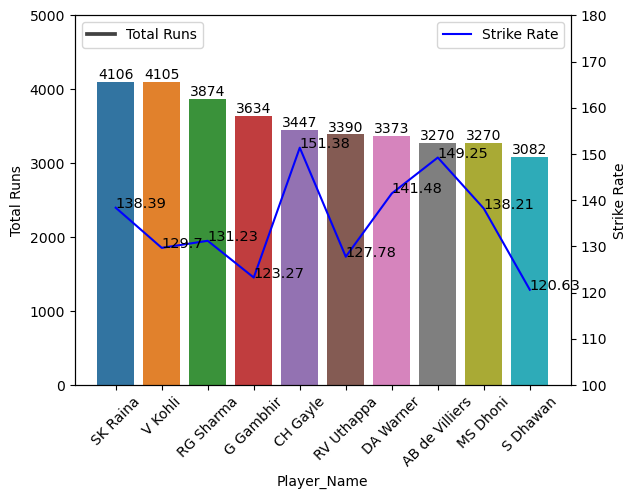

In [15]:
#visualization
ax2 = sns.barplot(
   x = 'Player_Name',
   y = 'Total_Runs',
   data = strike_rate2 
)
for i in ax2.containers:
    ax2.bar_label(i,)
#ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('Total Runs')
ax2.set_ylim(0, 5000)
ax2.legend(['Total Runs'], loc="upper left")
plt.xticks(rotation=45)

ax1 = ax2.twinx()
ax1 = sns.lineplot(
    x = 'Player_Name',
    y = 'Strike_Rate', 
    data=strike_rate2, 
    sort=False, 
    color='blue',
    markers=True
)
ax1.set_ylabel('Strike Rate')
for index in range(len(strike_rate2['Player_Name'])):
  ax1.text(strike_rate2['Player_Name'][index], strike_rate2['Strike_Rate'][index], strike_rate2['Strike_Rate'][index], size=10.5)
ax1.set_ylim(100, 180)
ax1.legend(['Strike Rate'], loc="upper right")


plt.show()

### Players with the most Man of the Match

In [16]:
#query
sql = """
select p.player_name, COUNT(m.Man_of_the_Match) as Total_Awards
from Match m
JOIN Player p
ON p.Player_Id = m.Man_of_the_Match
GROUP BY p.player_name
ORDER BY Total_Awards DESC
LIMIT 10

"""
m_o_m = pd.read_sql(sql, conn)

In [17]:
#visualization
cm = sns.color_palette("YlOrBr", as_cmap=True)
s = m_o_m.style.background_gradient(cmap=cm)
s

,Player_Name,Total_Awards
0,CH Gayle,17
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,14
4,SK Raina,13
5,RG Sharma,13
6,MS Dhoni,12
7,MEK Hussey,12
8,G Gambhir,12
9,AM Rahane,12


### Total runs scored and total wickets taken in each over

In [18]:
#Total runs scored query
sql = """
SELECT Over_Id AS Over_Number, SUM(Runs_Scored) AS Total_Runs
FROM Batsman_Scored
GROUP BY Over_id
"""
runs = pd.read_sql(sql, conn)

In [19]:
#Total wickets taken query
sql = """
SELECT Over_Id AS Over_Number, COUNT(Over_Id) AS Total_wickets
FROM Wicket_Taken
GROUP BY Over_Id
"""
wickets = pd.read_sql(sql, conn)

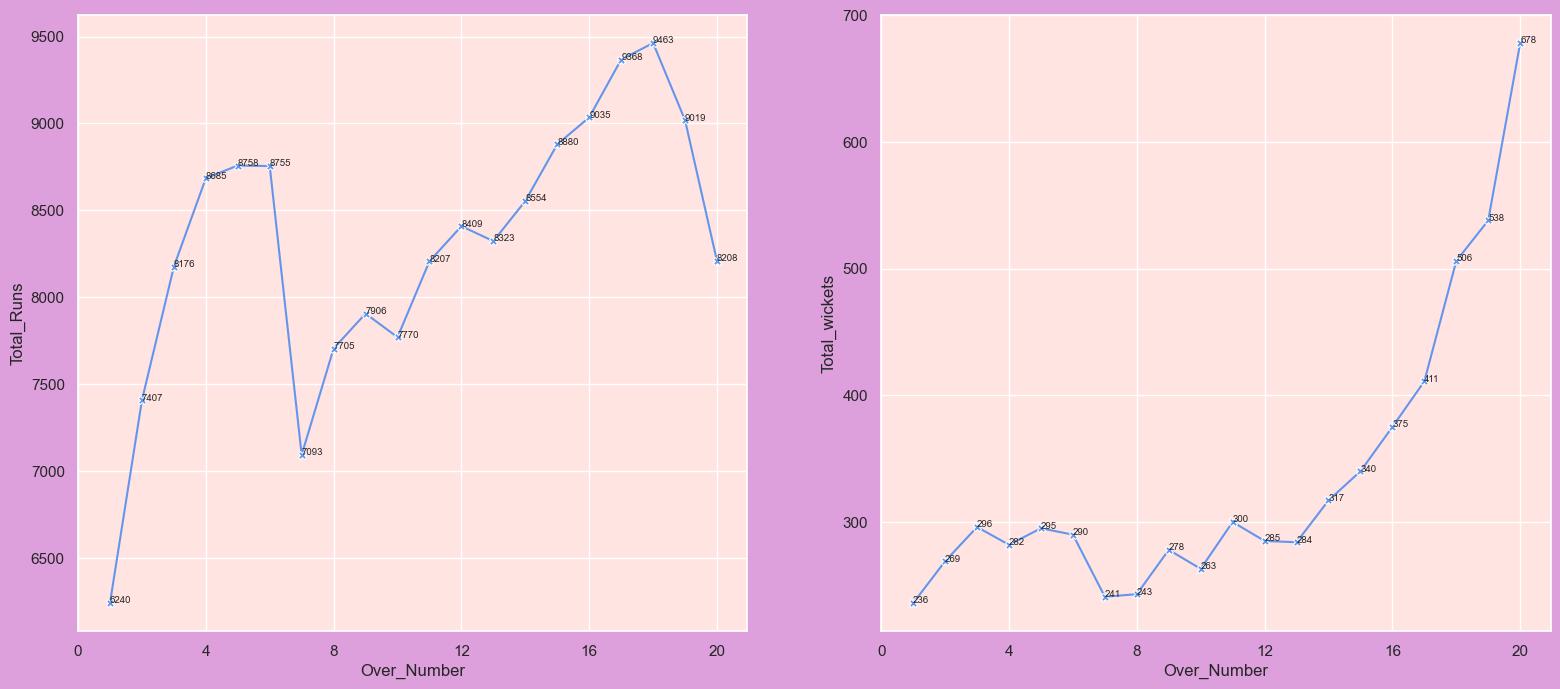

In [21]:
#visualization
plt.figure(figsize = (19,8))
#sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'mistyrose', 'figure.facecolor':'plum'})
plt.subplot(1, 2, 1)
ax1 = sns.lineplot(
    x = 'Over_Number',
    y = 'Total_Runs', 
    data=runs, 
    sort=False, 
    color='cornflowerblue',
    marker="X"
)
plt.xticks(ticks = [0,4,8,12,16,20])
for index in range(len(runs['Over_Number'])):
  ax1.text(runs['Over_Number'][index], runs['Total_Runs'][index], runs['Total_Runs'][index], size=7)
plt.subplot(1, 2, 2)
ax2 = sns.lineplot(
    x = 'Over_Number',
    y = 'Total_wickets', 
    data=wickets, 
    sort=False, 
    color='cornflowerblue',
    marker="X"
)
plt.xticks(ticks = [0,4,8,12,16,20])
for index in range(len(wickets['Over_Number'])):
  ax2.text(wickets['Over_Number'][index], wickets['Total_wickets'][index], wickets['Total_wickets'][index], size=7)
plt.show()

##### We see that while the runs scored drop in the final overs, the wickets taken increase as the innings comes to an end. There is an exponential increase in the later overs especially in the overs which are know as "Death overs" (overs 15-20)